# DATA LOADING

In [1]:
import numpy as np
import pandas as pd
import sklearn
df = pd.read_csv(r"D:\Downloads\Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# DATA MODIFICATIONS

In [2]:
df = df.rename({"Text" : "Reviews"}, axis=1)
df = df [["Score", "Reviews"]]
df.head()

,Score,Reviews
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [3]:
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 Score      0
Reviews    0
dtype: int64


# DATA COUNTING

In [4]:
total_reviews = df.shape[0]

value_counts = df['Score'].value_counts()
print(f"Value   Counts")
for value, count in value_counts.items():
    print(f"{str(value)}       {str(count)}")

print("Total Number of Reviews:", total_reviews)

Value   Counts
5       363122
4       80655
1       52268
3       42640
2       29769
Total Number of Reviews: 568454


In [5]:
duplicate_count = df.duplicated(subset='Reviews').sum()
print("Number of duplicate reviews:", duplicate_count)

duplicate_reviews_count = df['Reviews'].value_counts()
duplicate_reviews = duplicate_reviews_count[duplicate_reviews_count > 1].to_frame()

output_filename = "Dups_Count.csv"
duplicate_reviews.to_csv(output_filename, header=True)

output = pd.read_csv(output_filename)
print(output.head())


Number of duplicate reviews: 174875
                                             Reviews  count
0  This review will make me sound really stupid, ...    199
1  Diamond Almonds<br />Almonds are a good source...    126
2  I have two cats, one 6 and one 2 years old. Bo...     51
3  The pet food industry can be one of the most i...     45
4  I'm addicted to salty and tangy flavors, so wh...     42


In [6]:
df.drop_duplicates(subset='Reviews', keep='first', inplace=True)
duplicate_count = df.duplicated(subset='Reviews').sum()
print("Number of duplicate reviews:", duplicate_count)

total_reviews = df.shape[0]
print("Total Number of Reviews:", total_reviews)

Number of duplicate reviews: 0
Total Number of Reviews: 393579


In [7]:
import nltk
from nltk.tokenize import word_tokenize

def tokenization(text):
    tokens = word_tokenize(text)
    lowercase_tokens = [token.lower() for token in tokens]
    return tokens
df['Reviews'] = df['Reviews'].apply(tokenization)

print(df.head())

   Score                                            Reviews
0      5  [I, have, bought, several, of, the, Vitality, ...
1      1  [Product, arrived, labeled, as, Jumbo, Salted,...
2      4  [This, is, a, confection, that, has, been, aro...
3      2  [If, you, are, looking, for, the, secret, ingr...
4      5  [Great, taffy, at, a, great, price, ., There, ...


In [8]:
def convert_list_to_string(word_list):
    return ' '.join(word_list)

df['Reviews'] = df['Reviews'].apply(convert_list_to_string)

print(df)

        Score                                            Reviews
0           5  I have bought several of the Vitality canned d...
1           1  Product arrived labeled as Jumbo Salted Peanut...
2           4  This is a confection that has been around a fe...
3           2  If you are looking for the secret ingredient i...
4           5  Great taffy at a great price . There was a wid...
...       ...                                                ...
568449      5  Great for sesame chicken .. this is a good if ...
568450      2  I 'm disappointed with the flavor . The chocol...
568451      5  These stars are small , so you can give 10-15 ...
568452      5  These are the BEST treats for training and rew...
568453      5  I am very satisfied , product is as advertised...

[393579 rows x 2 columns]


# TEXT CLEANING

In [9]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
len(stop_words)

179

In [10]:
negative_words = {'no', 'not', "don't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "needn't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't", "never", "neither", "nor", "none", "nobody", "nowhere", "nothing", "hardly", "scarcely"}
stop_words = set(stop_words)

stop_words -= negative_words
len_stop_words = len(stop_words)

len(stop_words)

159

In [11]:
import contractions
import re

def text_cleaner(text):
    text = text.lower() 
    text = re.sub(r'<.*?>', ' ', text) 
    text = re.sub(r'http\S+', ' ', text)    
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    words = text.split()
    words = [contractions.fix(word) for word in words]
    cleaned_text = " ".join(word for word in words if word not in stop_words)
    return cleaned_text

In [12]:
text = "I’m never gonna give you up. But I shouldn't say that I can't bear to lose you.\n https://youtube.com <strong> Bold and brash </strong> \n<a href='https://www.w3schools.com'>Visit W3Schools</a>"
cleaned_words = text_cleaner(text)
print(cleaned_words)

i am never going to give should not say cannot bear lose bold brash visit w3schools


# DATA OVERVIEW

In [13]:
df['Reviews'] = df['Reviews'].apply(text_cleaner)
conditions = [
    (df['Score'] >= 4),
    (df['Score'] == 3),
    (df['Score'] <= 2)
    ]
values = ['Positive', 'Neutral', 'Negative']
df['Overview'] = np.select(conditions, values)
df.head()

,Score,Reviews,Overview
0,5,bought several vitality canned dog food produc...,Positive
1,1,product arrived labeled jumbo salted peanuts p...,Negative
2,4,confection around centuries light pillowy citr...,Positive
3,2,looking secret ingredient robitussin believe f...,Negative
4,5,great taffy great price wide assortment yummy ...,Positive


In [14]:
print(df.head(20))

    Score                                            Reviews  Overview
0       5  bought several vitality canned dog food produc...  Positive
1       1  product arrived labeled jumbo salted peanuts p...  Negative
2       4  confection around centuries light pillowy citr...  Positive
3       2  looking secret ingredient robitussin believe f...  Negative
4       5  great taffy great price wide assortment yummy ...  Positive
5       4  got wild hair taffy ordered five pound bag taf...  Positive
6       5  saltwater taffy great flavors soft chewy candy...  Positive
7       5  taffy good soft chewy flavors amazing would de...  Positive
8       5  right mostly sprouting cats eat grass love rot...  Positive
9       5  healthy dog food good digestion also good smal...  Positive
10      5  nt know cactus tequila unique combination ingr...  Positive
11      5  one boys needed lose weight nt put food floor ...  Positive
12      1  cats happily eating felidae platinum two years...  Negative
13    

<Axes: xlabel='Overview'>

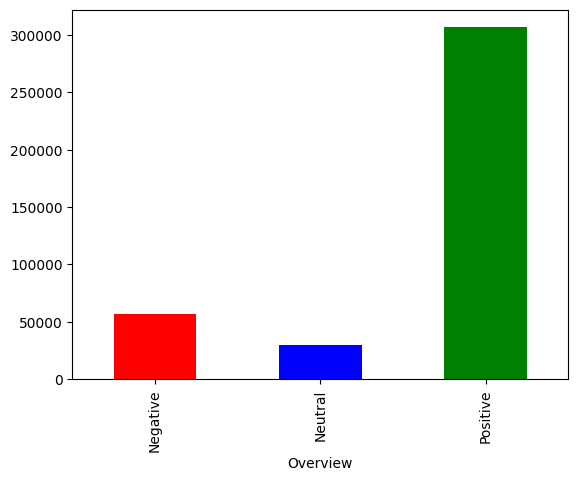

In [15]:
import matplotlib.pyplot as plt
df['Overview'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])

# DATASET SPLITTING

In [16]:
x = df['Reviews'].values
y = df['Overview'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [17]:
np.unique(y_train,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 45654,  23803, 245406], dtype=int64))

In [18]:
np.unique(y_test,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([11413,  5951, 61352], dtype=int64))

# Pipeline 1
    • Vectorization using TFIDF Vectorizer
    • Uing Single SVM Algorithm
    • Model Evaluation

In [19]:
from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.svm import SVC
#text_model = Pipeline([
#    ('tfidf',TfidfVectorizer()),('model',SVC())
#])

#text_model.fit(x_train,y_train)
#y_pred = text_model.predict(x_test)
#np.unique(y_pred,return_counts=True)

In [20]:
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#print(f"Accuracy Score: {accuracy_score(y_pred, y_test) * 100}")
#model = accuracy_score(y_pred, y_test) * 100

In [21]:
#confusion_matrix(y_pred,y_test)

In [22]:
#print(classification_report(y_pred,y_test))

In [23]:
#text_model.predict(['This product is stupid!'])

# # Pipeline 2
    • Vectorization using Hashing Vectorizer
    • Using Linear Kernel SVM Algorithm
    • Model Evaluation

In [24]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import LinearSVC
text_model2 = Pipeline([
    ('tfidf', HashingVectorizer(ngram_range=(1, 2))), 
    ('model', LinearSVC())
])

text_model2.fit(x_train,y_train)
y_pred2 = text_model2.predict(x_test)
np.unique(y_pred2,return_counts=True)

C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([10918,  1959, 65839], dtype=int64))

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_pred2, y_test) * 100}")
model2 = accuracy_score(y_pred2, y_test) * 100

Accuracy Score: 87.86904822399512


In [26]:
confusion_matrix(y_pred2,y_test)

array([[ 8324,  1473,  1121],
       [  453,  1059,   447],
       [ 2636,  3419, 59784]], dtype=int64)

In [27]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

    Negative       0.73      0.76      0.75     10918
     Neutral       0.18      0.54      0.27      1959
    Positive       0.97      0.91      0.94     65839

    accuracy                           0.88     78716
   macro avg       0.63      0.74      0.65     78716
weighted avg       0.92      0.88      0.90     78716



In [36]:
text = "I didn't like the food."
cleaned_words = text_cleaner(text)
text_model2.predict([cleaned_words])

array(['Negative'], dtype=object)

# Pipeline 3
    • Vectorization using Tfidf Vectorizer
    • Using Liner Kernel SVM Algorithm
    • Model Evaluation

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

text_model3 = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))), 
    ('model', LinearSVC())
])

text_model3.fit(x_train, y_train)
y_pred3 = text_model3.predict(x_test)
np.unique(y_pred3, return_counts=True)

C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([11068,  2203, 65445], dtype=int64))

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy Score: {accuracy_score(y_pred3, y_test) * 100}")
model3 = accuracy_score(y_pred3, y_test) * 100

Accuracy Score: 88.18537527313379


In [31]:
confusion_matrix(y_pred3,y_test)

array([[ 8476,  1497,  1095],
       [  510,  1188,   505],
       [ 2427,  3266, 59752]], dtype=int64)

In [32]:
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

    Negative       0.74      0.77      0.75     11068
     Neutral       0.20      0.54      0.29      2203
    Positive       0.97      0.91      0.94     65445

    accuracy                           0.88     78716
   macro avg       0.64      0.74      0.66     78716
weighted avg       0.92      0.88      0.90     78716



In [33]:
text = "I didn't like the food."
cleaned_words = text_cleaner(text)
text_model3.predict([cleaned_words])

array(['Negative'], dtype=object)

In [34]:
text_model3.predict(["I didn't like the food."])

array(['Positive'], dtype=object)

In [35]:
import joblib
joblib.dump(text_model3,'Review_Analyzer')

['Review_Analyzer']